In [1]:
#import modules
import os
import glob
import pandas as pd
#os.chdir("D:\\CsvToCombine")
filepath = 'D:\\CsvToCombine'
dataset = pd.read_csv(filepath +'\\new_combined_csv.csv')
print(dataset.head)

<bound method NDFrame.head of         CAR X  CAR Y  PED X  PED Y  NORMALIZED PEDESTRIAN POSITION X  \
0         0.0    0.0    0.0    0.0                               0.0   
1         0.0    0.0    0.0    0.5                               0.5   
2         0.0    0.0    0.0    1.0                               1.0   
3         0.0    0.0    0.0    1.5                               1.5   
4         0.0    0.0    0.0    2.0                               2.0   
...       ...    ...    ...    ...                               ...   
298545    0.0    0.0    5.0    3.0                               3.0   
298546    0.0    0.0    5.0    3.5                               3.5   
298547    0.0    0.0    5.0    4.0                               4.0   
298548    0.0    0.0    5.0    4.5                               4.5   
298549    0.0    0.0    5.0    5.0                               5.0   

        NORMALIZED PEDESTRIAN POSITION Y  NORMALIZED PEDESTRIAN DIRECTION  \
0                           

In [22]:
dataset.drop(columns=dataset.columns[0:4], axis=1,  inplace=True)
#duplicateRows = dataset[dataset.duplicated()]
dataset.drop('PEDESTRIAN DIRECTION', axis=1,  inplace=True)
dataset.drop('NORMALIZED CAR DIRECTION', axis=1,  inplace=True)
dataset.drop('PEDESTRIAN SPEED', axis=1,  inplace=True)
dataset.drop('CAR SPEED', axis=1,  inplace=True)
# duplicateRows = dataset[dataset.duplicated()]
# print(duplicateRows)
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.000000e+00,90.000000,0.0,2.0,0.0
1,0.5,3.061617e-17,90.000000,0.0,2.0,0.0
2,1.0,6.123234e-17,90.000000,0.0,2.0,0.0
3,1.5,9.184851e-17,90.000000,0.0,2.0,0.0
4,2.0,1.224647e-16,90.000000,0.0,2.0,0.0
...,...,...,...,...,...,...
298545,3.0,-5.000000e+00,93.141593,5.0,20.0,inf
298546,3.5,-5.000000e+00,93.141593,5.0,20.0,inf
298547,4.0,-5.000000e+00,93.141593,5.0,20.0,inf
298548,4.5,-5.000000e+00,93.141593,5.0,20.0,inf


In [23]:
print(max(dataset['TTC']))
print(min(dataset['TTC']))

inf
-164.1426021534943


In [24]:
import numpy as np
dataset = dataset.drop(dataset.index[dataset['TTC'] < 0])
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.000000e+00,90.000000,0.0,2.0,0.0
1,0.5,3.061617e-17,90.000000,0.0,2.0,0.0
2,1.0,6.123234e-17,90.000000,0.0,2.0,0.0
3,1.5,9.184851e-17,90.000000,0.0,2.0,0.0
4,2.0,1.224647e-16,90.000000,0.0,2.0,0.0
...,...,...,...,...,...,...
298545,3.0,-5.000000e+00,93.141593,5.0,20.0,inf
298546,3.5,-5.000000e+00,93.141593,5.0,20.0,inf
298547,4.0,-5.000000e+00,93.141593,5.0,20.0,inf
298548,4.5,-5.000000e+00,93.141593,5.0,20.0,inf


In [25]:
print(max(dataset['TTC']))
print(min(dataset['TTC']))

inf
0.0


In [27]:
dataset.replace([np.inf], -1, inplace=True)

In [28]:
print(max(dataset['TTC']))
print(min(dataset['TTC']))

6.0
-1.0


In [29]:
dataset.replace([-1], 7, inplace=True)

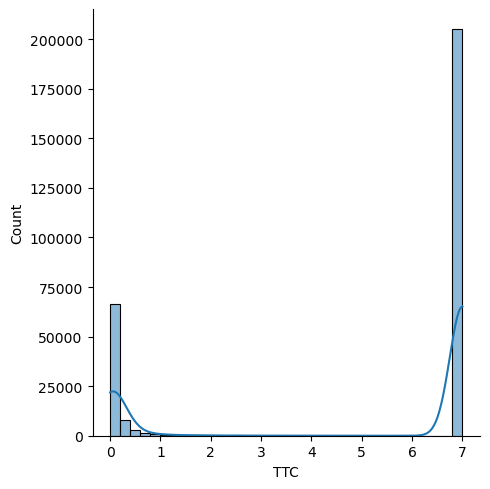

In [30]:
import seaborn as sns
sns.displot(dataset['TTC'], kde = True)


In [26]:
#dataset_cleaned = dataset.drop(dataset.index[dataset['TTC'] > 7])
#datasetnew = dataset.drop(dataset.index[dataset['TTC']== np.inf])
# dataset_7 = dataset.index[dataset['TTC'] > 7]
# dataset_7

Int64Index([    44,     45,     46,     47,     48,     49,     50,     51,
                52,     53,
            ...
            298540, 298541, 298542, 298543, 298544, 298545, 298546, 298547,
            298548, 298549],
           dtype='int64', length=204980)

In [31]:
dataset = dataset.drop_duplicates()

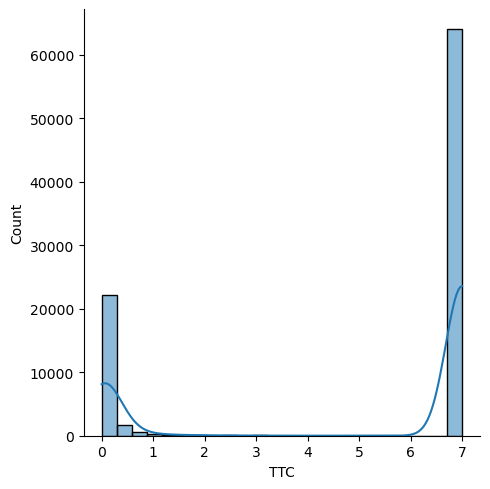

In [32]:
sns.displot(dataset['TTC'], kde = True)

In [33]:
pd.options.mode.chained_assignment = None  # default='warn'
dataset['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN DIRECTION'] = np.around(dataset['NORMALIZED PEDESTRIAN DIRECTION'].astype(float), decimals= 2)
dataset['TTC'] = np.around(dataset['TTC'].astype(float), decimals= 2)
#dataset_cleaned.replace([np.inf], 7, inplace=True)

In [34]:
print(max(dataset['TTC']))
print(min(dataset['TTC']))
dataset

7.0
0.0


,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.0,90.00,0.0,2.0,0.0
1,0.5,0.0,90.00,0.0,2.0,0.0
2,1.0,0.0,90.00,0.0,2.0,0.0
3,1.5,0.0,90.00,0.0,2.0,0.0
4,2.0,0.0,90.00,0.0,2.0,0.0
...,...,...,...,...,...,...
99013,3.0,-5.0,93.14,5.0,10.0,7.0
99014,3.5,-5.0,93.14,5.0,10.0,7.0
99015,4.0,-5.0,93.14,5.0,10.0,7.0
99016,4.5,-5.0,93.14,5.0,10.0,7.0


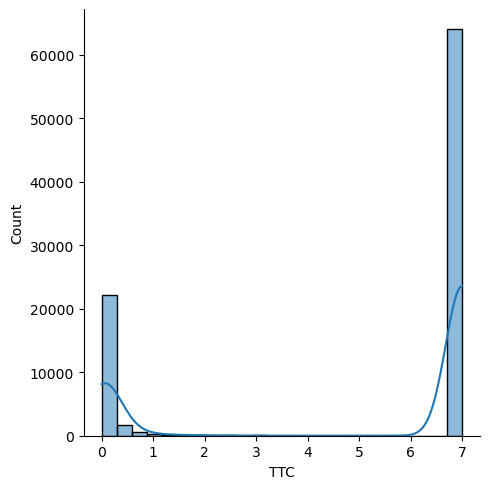

In [35]:
sns.displot(dataset['TTC'], kde = True)

In [36]:
#unique_dataset.loc[(unique_dataset['TTC'] >= 6) & (unique_dataset['TTC'] < 7)]
#unique_dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)


[[ 0.    0.   90.    0.    2.  ]
 [ 0.5   0.   90.    0.    2.  ]
 [ 1.    0.   90.    0.    2.  ]
 ...
 [ 4.   -5.   93.14  5.   10.  ]
 [ 4.5  -5.   93.14  5.   10.  ]
 [ 5.   -5.   93.14  5.   10.  ]]
[0. 0. 0. ... 7. 7. 7.]


In [39]:
dataset.loc[(dataset['TTC'] >= 4) & (dataset['TTC'] < 6)]

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
2550,4.5,0.0,90.00,1.5,2.0,4.00
2551,5.0,0.0,90.00,1.5,2.0,5.00
2561,4.5,-0.5,90.00,1.5,2.0,4.00
2562,5.0,-0.5,90.00,1.5,2.0,5.00
2572,4.5,-1.0,90.00,1.5,2.0,4.00
...,...,...,...,...,...,...
15826,5.0,0.0,92.62,3.5,4.0,4.96
15836,4.5,-0.5,92.62,3.5,4.0,4.01
15837,5.0,-0.5,92.62,3.5,4.0,5.22
15947,5.0,0.0,93.14,3.5,4.0,4.95


In [40]:
from sklearn.model_selection import train_test_split

# assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
import smogn
balanced_dataset = smogn.smoter(data=dataset, y = "TTC")

ValueError: redefine phi relevance function: all points are 1

In [ ]:
from imblearn.over_sampling import SMOTE

# separate features and target variable
X = unique_dataset.drop(['TTC'], axis=1)
y = unique_dataset['TTC']

# apply SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)